# Trabajo Práctico 0:  Algoritmo de Maximización de la Esperanza

**Profesor**: Saúl Calderón Ramírez

**Estudiantes**: 

* Ricardo Chacon
* Marco Ferraro
* Gabriel Valentine


## 1. Algoritmo de Maximización de la Esperanza con datos artificiales

En esta sección se llevará a cabo una implementación de un algoritmo de maximización de la esperanza. Se utilizará un grupo de funciones base.

### 1.1 Generate Data

Esta función se encarga de generar observaciones aleatorias de `K` distribuciones Gaussianas. Por defecto `K` va a presentar valor de 2.  Se recibe de parametro `N` que representa la tolidad de puntos u observaciones que se quiere generar. Un array de medias y otro de desviaciones estandar de las distribuciones respectivas. 

Cabe destacar que esta función retorna todas las observaciones en una matriz de dimension `Nx1`.

In [106]:
import numpy as np

def generate_data(N, means: np.ndarray, stds: np.ndarray, K=2):
  if len(means) != len(stds):
    print("Error in dimensions")
    return None
  else:
    data = []
    for i in range(K):
      y = np.sqrt(-2 * np.log(np.random.rand(N // K))) * np.cos(2 * np.pi * np.random.rand(N // 2))
      y = (y * stds[i]) + means[i]

      data.append(y)

    X = np.concatenate(data)
    
    # Mezclar datos para que no esten ordenados
    np.random.shuffle(X)

    return X.reshape(-1, 1)



In [97]:
N = 100

means = [3.0, 7.0]
stds = [0.5, 0.8]

data = generate_data(N=100, means=means, stds=stds)
data

array([[2.5105614 ],
       [2.62361019],
       [3.39850021],
       [2.75586578],
       [7.07506722],
       [5.51763152],
       [6.05490056],
       [2.86312787],
       [6.69955086],
       [3.01487769],
       [6.76943272],
       [3.22531495],
       [8.20174216],
       [3.61407708],
       [7.79337375],
       [2.94145626],
       [3.37863876],
       [6.82904559],
       [6.46220718],
       [6.03307467],
       [3.86950401],
       [2.8069864 ],
       [2.6575708 ],
       [2.63522036],
       [2.6720846 ],
       [2.72964113],
       [2.99918807],
       [6.804681  ],
       [6.04015195],
       [2.81666142],
       [5.51951458],
       [6.8678586 ],
       [2.06277172],
       [3.1315524 ],
       [5.59845541],
       [4.04752391],
       [2.83372746],
       [2.35026415],
       [3.18393344],
       [2.7634509 ],
       [3.75921654],
       [2.98878234],
       [3.47366593],
       [6.0250179 ],
       [5.03760453],
       [2.94426327],
       [3.22584177],
       [7.842

In [98]:
import matplotlib.pyplot as plt
import numpy as np

def plot_data(data, title='Two Normal Distributions'):
    hist_values, bin_edges = np.histogram(data, bins=20)
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.bar(bin_edges[:-1], hist_values, width=np.diff(bin_edges), color='skyblue', alpha=0.7, label='Frequency')
    ax.scatter(data, np.zeros_like(data), marker='o', s=30, color='b', label='Data')

    y_min, y_max = ax.get_ylim()
    ax.set_ylim(y_min - 0.5, y_max + 0.1)

    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    ax.set_title(title)
    ax.grid(True, which='both')
    
    ax.legend()
    plt.show()

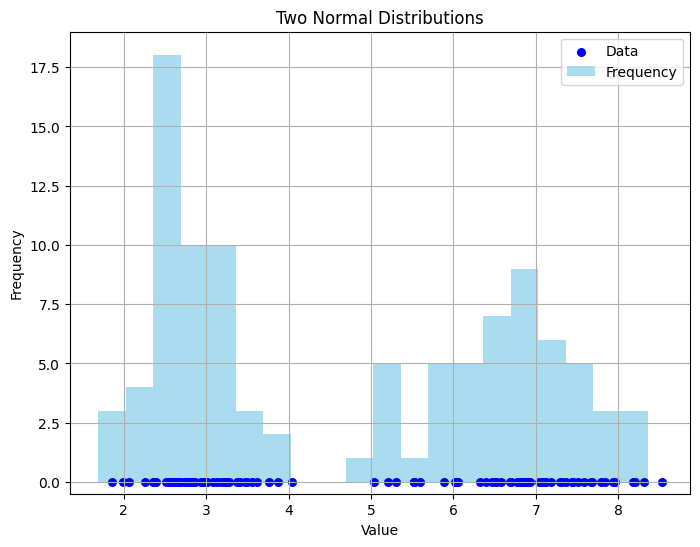

In [99]:
plot_data(data)

In [100]:

# El asterisco es para desempacar la tupla. 
def init_random_parameters(K, mean_range=(0, 10), std_range=(0, 1)):
  means = np.random.uniform(*mean_range, size=K)
  stds = np.random.uniform(*std_range, size=K)
  
  params = np.column_stack((means, stds)).tolist()

  return params

In [105]:
init_random_parameters(3)

[[1.0364276575324005, 0.5306393818072032],
 [8.721509727957514, 0.4775748753590756],
 [6.528119905640799, 0.8523674564754635]]